**1.Introduction:**

This notebook explores the relationship between trader behavior and market sentiment (Fear & Greed). By combining historical trading data with the Bitcoin Fear & Greed Index,

In [35]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")


Libraries imported successfully


**2.Dataset Description**

*  **Historical Trader Data**:

1.    Source: Hyperliquid
2.   Description: Trade-level execution data including price, size, direction, and PnL.



* **Bitcoin Market Sentiment Data**:


1.   Source: Fear & Greed Index
2.   Description: Daily classification of market sentiment ranging from Extreme Fear to Extreme Greed.




In [36]:
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

historical_df.head(), sentiment_df.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

3.Initial Data Inspection


In [37]:
historical_df = pd.read_csv(
    "historical_data.csv",
    low_memory=False
)
historical_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

**4.Data Preprocessing and Cleaning**


*   Timestamp Conversions
*   Handling Data Types



In [38]:
historical_df['Timestamp IST'] = pd.to_datetime(
    historical_df['Timestamp IST'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)

historical_df[['Timestamp IST']].head()


,Timestamp IST
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00


In [39]:
historical_df['Date'] = historical_df['Timestamp IST'].dt.date
historical_df[['Timestamp IST', 'Date']].head()


,Timestamp IST,Date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [40]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [41]:
sentiment_df.columns
sentiment_df['classification'].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [42]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**5.Merging Trader Data with Market Sentiment**

In [43]:
historical_df.rename(columns={'Date': 'date'}, inplace=True)
merged_df = pd.merge(
    historical_df,
    sentiment_df,
    on='date',
    how='inner'
)

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


**6.EDA**


*   Sentiment Distribution
*   Profitability Analysis (Closed PnL vs Sentiment)


*   Trade Size Analysis (Risk Appetite)
*   Buy vs Sell Behavior







In [44]:
merged_df['classification'].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [45]:
num_cols = [
    'Execution Price',
    'Size Tokens',
    'Size USD',
    'Closed PnL',
    'Fee'
]

for col in num_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


In [46]:
merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'sum', 'count'])


,mean,sum,count
classification,,,
Extreme Fear,34.537862,7.391102e+05,21400
Extreme Greed,67.892861,2.715171e+06,39992
Fear,54.290400,3.357155e+06,61837
Greed,42.743559,2.150129e+06,50303
Neutral,34.307718,1.292921e+06,37686


In [47]:
merged_df.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [48]:
pd.crosstab(merged_df['classification'], merged_df['Side'])

Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


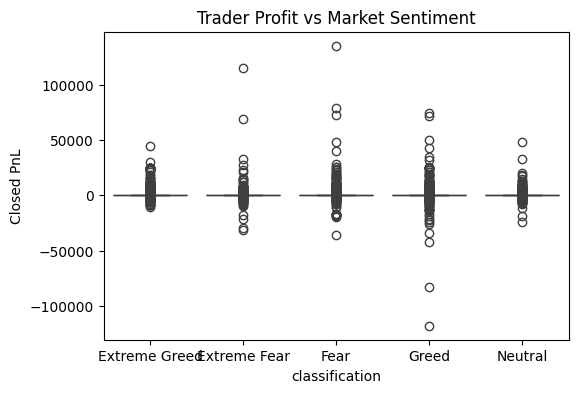

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Trader Profit vs Market Sentiment')
plt.savefig('pnl_vs_sentiment.png')
plt.show()

In [50]:
filtered_df = merged_df[merged_df['Closed PnL'] != 0]


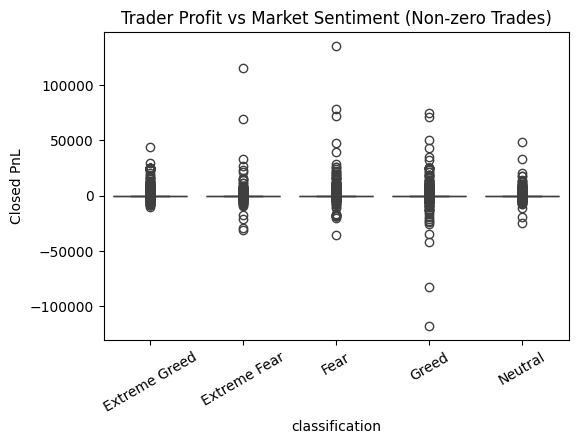

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='Closed PnL', data=filtered_df)
plt.title('Trader Profit vs Market Sentiment (Non-zero Trades)')
plt.xticks(rotation=30)
plt.show()


**7.Visualization of Key Insights**

In [52]:
#Trade Size (Risk) vs Sentiment
merged_df.groupby('classification')['Size USD'].mean()

,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [53]:
# Win vs Loss Ratio (Behavioral Edge)
merged_df['win'] = merged_df['Closed PnL'] > 0
pd.crosstab(merged_df['classification'], merged_df['win'], normalize='index')


win,False,True
classification,,
Extreme Fear,0.629393,0.370607
Extreme Greed,0.535057,0.464943
Fear,0.579232,0.420768
Greed,0.615172,0.384828
Neutral,0.603009,0.396991


In [54]:
# Daily Aggregation (Cleaner signal)
# Instead of trade-level noise:
daily_df = merged_df.groupby(['date', 'classification'])['Closed PnL'].sum().reset_index()


In [55]:
merged_df.to_csv("merged_data.csv", index=False)
print("merged_data.csv saved successfully")


merged_data.csv saved successfully


**8.Conclusion & Key Insights**


1.   Extreme Greed and Extreme Fear show higher PnL volatility
2.   Median trade-level PnL remains close to zero across sentiments


3.   Traders exhibit higher risk-taking behavior during Greed phases
4.   Sentiment awareness can help improve risk management strategies



